A1 de Linguagens de Programação – 19/09/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Lucas Emanuel Resck Domingues
Olá, Lucas Emanuel Resck Domingues!
Bom trabalho!


In [77]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import time
from IPython.display import clear_output
%matplotlib inline

Questão 1 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:  
a) Crie uma função genérica para construir um dicionário de frequências de palavras de um texto (string), passado como parâmetro. Aplique a função ao texto;  
b) Identifique os candidatos a nomes próprios no texto;  
c) Imagine que o texto seja constituído pela soma de suas letras, com repetições. Com esta "caixa de letras", quantas vezes você conseguiria escrever seu nome completo? Use as letras da variável meu_nome, sem os espaços em branco.  
d) Identifique as palavras que só ocorrem uma vez;  
e) Crie código para salvar os resultados em um arquivo chamado "respostas_q1.txt" no computador.  

In [258]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [259]:
#a)
def dicionario(texto):
    palavras = texto.split()
    palavras = map(lambda palavra: palavra.strip().lower().strip(string.punctuation), palavras)
    palavras = list(palavras)
    frequencia = {palavra: palavras.count(palavra) for palavra in palavras}
    return frequencia

In [260]:
a = dicionario(texto)

In [262]:
palavras = texto.split()
PalavrasSemPont = [palavra.strip().strip(string.punctuation) for palavra in palavras]
nomes = []
for palavra in range(1, len(PalavrasSemPont)):
    if PalavrasSemPont[palavra].istitle() and not palavras[palavra - 1][-1] in string.punctuation:
        nomes.append(PalavrasSemPont[palavra])
b = nomes

In [263]:
letras_nome = {}
for letra in string.ascii_lowercase:
    letras_nome.update({letra: meu_nome.lower().count(letra)})

letras_nome = letras_nome.items()
letras_nome2 = []
for letra in letras_nome:
    letras_nome2.append(letra[1])
    
letras_nome2 = np.array(letras_nome2)

letras_texto = {}
for letra in string.ascii_lowercase:
    letras_texto.update({letra: texto.count(letra)})
    
letras_texto = letras_texto.items()
letras_texto2 = []
for letra in letras_texto:
    letras_texto2.append(letra[1])
    
letras_texto2 = np.array(letras_texto2)

contagem = 0
while not 0 in letras_texto2:
    letras_texto2 = letras_texto2 - 1
    contagem += 1
    
c = contagem   

In [264]:
palavras = texto.split()
palavras = [palavra.strip().strip(string.punctuation).lower() for palavra in palavras]
UmaVez = []
for palavra in palavras:
    if palavras.count(palavra) == 1:
        UmaVez.append(palavra)
d = set(UmaVez)

In [272]:
with open("respostas_q1.txt", mode = "w", encoding = "utf-8") as arquivo:
    arquivo.write("a) " + str(a) + "\n")
    arquivo.write("b) " + str(b) + "\n")
    arquivo.write("c) " + str(c) + "\n")
    arquivo.write("d) " + str(d) + "\n")

Questão 2 (2.0 pontos)  

Seja d(n) definido como a suma dos divisores inteiros de n. Se d(a) = b e d(b) = a, sendo a ≠ b, então a e b são um "par amigável" de números.  

Por exemplo, os divisores inteiros de 220 são 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 e 110; então d(220) = 284.  
Os divisores inteiros de 284 são 1, 2, 4, 71 e 142; então d(284) = 220.  

Encontre todos os "pares amigáveis" de números menores que 20000.  Crie uma lista de tuplas com esses pares.  

In [281]:
def d(n):
    divisores = []
    for numero in range(n - 1, 0, -1):
        if n % numero == 0:
            divisores.append(numero)
    soma = sum(divisores)
    return soma

In [282]:
SomaDiv = [0] * 20000
for numero in range(1, 20000):
    SomaDiv[numero] = d(numero)

In [286]:
amigaveis = []
for a in range(1, 20000):
    b = SomaDiv[a]
    if b < 20000:
        c = SomaDiv[b]
        if c == a and a != b:
            if not (b, a) in amigaveis:
                amigaveis.append((a, b))
print(amigaveis)

[(220, 284), (1184, 1210), (2620, 2924), (5020, 5564), (6232, 6368), (10744, 10856), (12285, 14595), (17296, 18416)]


Questão 3 (2.5 pontos)  

Usando funções geradoras, crie um objeto que emule um dado de oito faces (1-8) que seja viciado, de tal forma que a probabilidade desta função geradora retornar certo valor seja proporcional ao próprio valor (por exemplo, a face 6 é 3 vezes mais provável de sair do que a face 2).  

(a) Usando os comandos plt.plot ou plt.hist, mostre graficamente o resultado de 10000 lançamentos;  
(b) Modifique esta função geradora de forma que ela termine automaticamente quando todos os valores possíveis (1,2,3,4,5,6,7,8) tiverem sido retornados pelo menos uma vez. Neste caso, ela retornará o tempo absoluto total que ocorreu desde a primeira iteração.  

In [155]:
def dado():
    while True:
        numero = random.randint(1, 36)
        if numero == 1:
            resultado = 1
        elif numero <= 3:
            resultado = 2
        elif numero <= 6:
            resultado = 3
        elif numero <= 10:
            resultado = 4
        elif numero <= 15:
            resultado = 5
        elif numero <= 21:
            resultado = 6
        elif numero <= 28:
            resultado = 7
        else:
            resultado = 8
        yield resultado

In [156]:
dadinho = dado()
resultados = []
for i in range(10000):
    resultados.append(next(dadinho))

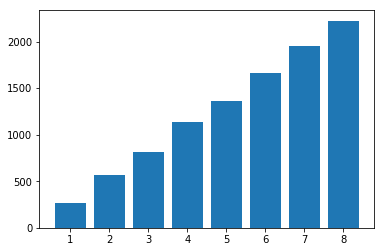

In [157]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8], [resultados.count(1), resultados.count(2), resultados.count(3), resultados.count(4), resultados.count(5), resultados.count(6), resultados.count(7), resultados.count(8)])
plt.show()

In [187]:
def dado2():
    resultados = [1, 2, 3, 4, 5, 6, 7, 8]
    tempo0 = time.time()
    while resultados != []:
        numero = random.randint(1, 36)
        if numero == 1 and 1 in resultados:
            resultados.remove(1)
        elif numero == 2 and 2 in resultados:
            resultados.remove(2)
        elif numero == 3 and 3 in resultados:
            resultados.remove(3)
        elif numero == 4 and 4 in resultados:
            resultados.remove(4)
        elif numero == 5 and 5 in resultados:
            resultados.remove(5)
        elif numero == 6 and 6 in resultados:
            resultados.remove(6)
        elif numero == 7 and 7 in resultados:
            resultados.remove(7)
        elif numero == 8 and 8 in resultados:
            resultados.remove(8)
        yield 0
    yield time.time() - tempo0

In [188]:
dadinho2 = dado2()

In [189]:
tempo = 0
while tempo == 0:
    tempo = next(dadinho2)
print(tempo)

0.0004062652587890625


Questão 4 (3.0 pontos)   

Crie uma classe chamada "Elevador" que recebe, ao instanciada, o número de andares do edifício e inicia no andar mais baixo.  
Crie métodos e propriedades para permitir que o elevador:  
- Receba uma chamada (usuário aperta um botão em um andar);  
- Receba um andar como destino (usuários apertam botões dentro do elevador);  
- Informe em qual andar o elevador está;  
- Informe a sequência de andares ainda por visitar;
- Informe a quantidade de vezes que parou em cada andar (passar pelo andar sem "parar" no andar não conta);  

Leve em consideração que cada deslocamento de andar demora 3 segundos.  
Simule o comportamento do elevador atendendo à dez usuários, que têm andar de origem, andar de destino e sequência de chegada (fora e dentro do elevador) definidos aleatóriamente.  

In [439]:
class Elevador():
    def __init__(self, nandares):
        self.nandares = nandares
        self.posicao = 0
        paradas = list(range(nandares + 1))
        paradas1 = [0] * (nandares + 1)
        self.paradas = list(zip(paradas, paradas1))
        self.paradas = [list(tupla) for tupla in self.paradas]
        self.paradas[0][1] = 1 #Posição inicial
        
    def chamada(self, andares):
        self.andares = andares
        if type(self.andares) == list:
            self.andares = list(set(self.andares))
            self.andares.sort()
            
        if self.andares[0] == self.posicao:
            self.andares.remove(self.posicao)
            
        if self.andares[0] > self.posicao:
            self.sentido = "cima"
        else:
            self.sentido = "baixo"
        time.sleep(abs((self.andares[0] - self.posicao) * 3))
        self.posicao = self.andares[0]
        self.andares.remove(self.posicao)
        
        if self.posicao == 0:
            self.sentido = "cima"
        elif self.posicao == self.nandares:
            self.sentido = "baixo"
            
        self.paradas[self.posicao][1] += 1
        
    def destino(self, andar):
        if not andar in self.andares:
            self.andares.append(andar)
        if type(self.andares) == list:
            self.andares.sort()
            
        if self.andares[0] == self.posicao:
            self.andares.remove(self.posicao)
            
        if self.sentido == "cima":
            andarescima = [andar for andar in self.andares if andar > self.posicao]
            time.sleep(abs((andarescima[0] - self.posicao) * 3))
            self.posicao = andarescima[0]
        else:
            andaresbaixo = [andar for andar in self.andares if andar < self.posicao]
            time.sleep(abs((andaresbaixo[-1] - self.posicao) * 3))
            self.posicao = andaresbaixo[-1]
        self.andares.remove(self.posicao)
        
        if self.posicao == 0:
            self.sentido = "cima"
        elif self.posicao == self.nandares:
            self.sentido = "baixo"
            
        self.paradas[self.posicao][1] += 1

In [440]:
fgv = Elevador(10)

In [441]:
fgv.chamada([random.randint(0, 10) for n in range(10)])
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

PossiveisEscolhas = list(range(11))
PossiveisEscolhas.remove(fgv.posicao)
fgv.destino(random.choice(PossiveisEscolhas))
print(fgv.posicao, fgv.andares, fgv.paradas)

4 [6, 8, 9, 10] [[0, 1], [1, 0], [2, 0], [3, 0], [4, 1], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0]]
5 [6, 8, 9, 10] [[0, 1], [1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0]]
6 [8, 9, 10] [[0, 1], [1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 1], [7, 0], [8, 0], [9, 0], [10, 0]]
8 [9, 10] [[0, 1], [1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 1], [7, 0], [8, 1], [9, 0], [10, 0]]
9 [7, 10] [[0, 1], [1, 0], [2, 0], [3, 0], [4, 1], [5, 1], [6, 1], [7, 0], [8, 1], [9, 1], [10, 0]]


KeyboardInterrupt: 

Questão bônus I (0.5 ponto)   

Ilustre graficamente as posições do elevador acima para a simulação pedida:  

In [ ]:
#seu código aqui

Questão bônus II (0.5 ponto)   

Crie um simulador de prédio inteligente, controlando chamadas feitas para n > 1 elevadores:  

In [ ]:
#seu código aqui